# Определение закономерностей определяющих успешность компьютерной игры

Вы работаете в интернет-магазине «Стримчик», который продаёт по всему миру компьютерные игры.  
Из открытых источников доступны исторические данные о продажах игр, оценки пользователей и экспертов, жанры и платформы (например, Xbox или PlayStation). Вам нужно выявить определяющие успешность игры закономерности. Это позволит сделать ставку на потенциально популярный продукт и спланировать рекламные кампании.  
Перед вами данные до 2016 года. Представим, что сейчас декабрь 2016 г., и вы планируете кампанию на 2017-й. Нужно отработать принцип работы с данными. Не важно, прогнозируете ли вы продажи на 2017 год по данным 2016-го или же 2027-й — по данным 2026 года.

## Задачи исследования
- подготовить данные для анализа
- провести исследовательский анализ данных  
 - Посмотрите, сколько игр выпускалось в разные годы. Важны ли данные за все периоды?
 - Посмотрите, как менялись продажи по платформам. Выберите платформы с наибольшими суммарными продажами и постройте распределение по годам. За какой характерный срок появляются новые и исчезают старые платформы?
 - Возьмите данные за соответствующий актуальный период. Актуальный период определите самостоятельно в результате исследования предыдущих вопросов. Основной фактор — эти данные помогут построить прогноз на 2017 год.
 - Какие платформы лидируют по продажам, растут или падают? Выберите несколько потенциально прибыльных платформ.
 - Постройте график «ящик с усами» по глобальным продажам игр в разбивке по платформам. Опишите результат.
 - Посмотрите, как влияют на продажи внутри одной популярной платформы отзывы пользователей и критиков. Постройте диаграмму рассеяния и посчитайте корреляцию между отзывами и продажами. Сформулируйте выводы.
 - Соотнесите выводы с продажами игр на других платформах.
 - Посмотрите на общее распределение игр по жанрам. Что можно сказать о самых прибыльных жанрах? Выделяются ли жанры с высокими и низкими продажами?
- составить "портрет" пользователя для каждого региона
 - Самые популярные платформы (топ-5). Опишите различия в долях продаж.
 - Самые популярные жанры (топ-5). Поясните разницу.
 - Влияет ли рейтинг ESRB на продажи в отдельном регионе?
- проверить гипотезы
 - Средние пользовательские рейтинги платформ Xbox One и PC одинаковые;
 - Средние пользовательские рейтинги жанров Action (англ. «действие», экшен-игры) и Sports (англ. «спортивные соревнования») разные.

## Описание данных
- Name — название игры
- Platform — платформа
- Year_of_Release — год выпуска
- Genre — жанр игры
- NA_sales — продажи в Северной Америке (миллионы долларов)
- EU_sales — продажи в Европе (миллионы долларов)
- JP_sales — продажи в Японии (миллионы долларов)
- Other_sales — продажи в других странах (миллионы долларов)
- Critic_Score — оценка критиков (максимум 100)
- User_Score — оценка пользователей (максимум 10)
- Rating — рейтинг от организации ESRB (англ. Entertainment Software Rating Board). Эта ассоциация определяет рейтинг компьютерных игр и присваивает им подходящую возрастную категорию.

### Шаг 1. Откройте файл с данными и изучите общую информацию

In [1]:
# настраиваем окружение
import pandas as pd
import matplotlib.pyplot as plt
from collections import Counter
from math import ceil
import seaborn as sns
import numpy as np
from scipy import stats as st

pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [2]:
#games = pd.read_csv('C:\\Y.Practikum\\project_4\\dataset\\games.csv', sep=',')
games = pd.read_csv('/datasets/games.csv', sep=',')

games.info()
games.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
Name               16713 non-null object
Platform           16715 non-null object
Year_of_Release    16446 non-null float64
Genre              16713 non-null object
NA_sales           16715 non-null float64
EU_sales           16715 non-null float64
JP_sales           16715 non-null float64
Other_sales        16715 non-null float64
Critic_Score       8137 non-null float64
User_Score         10014 non-null object
Rating             9949 non-null object
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN


In [3]:
games.describe()

,Year_of_Release,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score
count,16446.000000,16715.000000,16715.000000,16715.000000,16715.000000,8137.000000
mean,2006.484616,0.263377,0.145060,0.077617,0.047342,68.967679
std,5.877050,0.813604,0.503339,0.308853,0.186731,13.938165
min,1980.000000,0.000000,0.000000,0.000000,0.000000,13.000000
25%,2003.000000,0.000000,0.000000,0.000000,0.000000,60.000000
50%,2007.000000,0.080000,0.020000,0.000000,0.010000,71.000000
75%,2010.000000,0.240000,0.110000,0.040000,0.030000,79.000000
max,2016.000000,41.360000,28.960000,10.220000,10.570000,98.000000


### Вывод
- датасет содержит 16715 записей
- в данных есть пропуски
- названия столбцов нужно привести к нижнему регистру
- требуется преобразование типов данных

### Шаг 2. Подготовьте данные
__План подготовки данных__
- Замените названия столбцов (приведите к нижнему регистру);
- Преобразуйте данные в нужные типы. Опишите, в каких столбцах заменили тип данных и почему;
- Обработайте пропуски при необходимости;
- Обратите внимание на аббревиатуру 'tbd' в столбцах с рейтингом. Отдельно разберите это значение и опишите, как его обработать;
- Посчитайте суммарные продажи во всех регионах и запишите их в отдельный столбец.

In [4]:
# приведем названия стобцов к нижнему регистру
games.set_axis(['name', 
                'platform', 
                'year_of_release', 
                'genre', 
                'na_sales', 
                'eu_sales', 
                'jp_sales', 
                'other_sales',
                'critic_score',
                'user_score',
                'rating'], axis='columns', inplace=True)

games.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
name               16713 non-null object
platform           16715 non-null object
year_of_release    16446 non-null float64
genre              16713 non-null object
na_sales           16715 non-null float64
eu_sales           16715 non-null float64
jp_sales           16715 non-null float64
other_sales        16715 non-null float64
critic_score       8137 non-null float64
user_score         10014 non-null object
rating             9949 non-null object
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


In [5]:
# удаляем записи с пропусками
# игры без даты выпуска или без жанра бесполезны для анализа
games = games.dropna(subset=['year_of_release', 'genre'], axis='index')

# в столбцах с рейтингами заполняем пропуски нулями
games['critic_score'].fillna(0, inplace=True)
games['user_score'].fillna(0, inplace=True)

In [6]:
# tbd в рейтинге игры означает To Be Determined, т.е. будет определено позже. 
# Игра еще не вышла или совсем новая, рейтинга еще нет 

# В числовых значениях нам tbd точно не нужно, заменим на 0
games['user_score'].replace('tbd', 0, inplace=True)

In [7]:
# тип заменим на корректный чтобы удобнее было работать с числовыми данными
# год выпуска приводим к int64
# рейтинг к float
games = games.astype({'year_of_release': 'int64', 
                      'user_score': 'float64'})
games.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16444 entries, 0 to 16714
Data columns (total 11 columns):
name               16444 non-null object
platform           16444 non-null object
year_of_release    16444 non-null int64
genre              16444 non-null object
na_sales           16444 non-null float64
eu_sales           16444 non-null float64
jp_sales           16444 non-null float64
other_sales        16444 non-null float64
critic_score       16444 non-null float64
user_score         16444 non-null float64
rating             9768 non-null object
dtypes: float64(6), int64(1), object(4)
memory usage: 1.5+ MB


In [30]:
# пропуски в рейтинге заменим на константу, чтобы затем проще было группировать игры по рейтингу
games['rating'] = games['rating'].fillna('Not defined')

In [32]:
# проанализируем у каких игр отсутствует рейтинг
games.query('rating == "Not defined"').describe()

,year_of_release,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,world_sales
count,6676.000000,6676.000000,6676.000000,6676.000000,6676.000000,6676.000000,6676.000000,6676.000000
mean,2004.883463,0.183619,0.091320,0.125336,0.022449,0.835980,0.087133,0.422723
std,7.491332,0.800182,0.349929,0.385235,0.092573,7.667641,0.792370,1.363695
min,1980.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1999.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.040000
50%,2007.000000,0.000000,0.000000,0.020000,0.000000,0.000000,0.000000,0.110000
75%,2011.000000,0.120000,0.050000,0.100000,0.010000,0.000000,0.000000,0.330000
max,2016.000000,29.080000,10.950000,10.220000,2.740000,93.000000,9.200000,40.240000


tbd в рейтинге игры означает To Be Determined, т.е. будет определено позже. Игра еще не вышла или совсем новая, рейтинга еще нет   
Отсутствие рейтинга ESRB у игры не связано с годом выпуска игры, жанром и т.д. Но у большенства игр без рейтинга ESRB также нет оценки критиков и игроков.

In [9]:
# Посчитайте суммарные продажи во всех регионах и запишите их в отдельный столбец.
games['world_sales'] = games['na_sales'] + games['eu_sales'] + games['jp_sales'] + games['other_sales']
games.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,world_sales
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76.0,8.0,E,82.54
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,0.0,0.0,Not defined,40.24
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E,35.52
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80.0,8.0,E,32.77
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,0.0,0.0,Not defined,31.38


### Вывод
- названия столбцов приведены к нижнему регистру
- записи с пропусками в столбцах year_of_release и genre удалены из датасета, т.к. эти колонки важны для анализа
- пропуски в столбцах заменены на значение 0, типы данных приведены к числовым чтобы с рейтингами можно было проводить мат. вычисления
- tbd в рейтинге игры означает To Be Determined, т.е. будет определено позже. Игра еще не вышла (демо) или совсем новая, рейтинга еще нет. Значение tdb заменено на 0 
- Отсутствие рейтинга у игры не связано с годом выпуска игры, жанром и т.д. Но у большенства игр без рейтинга ESRB также нет оценки критиков и игроков. Пропуски в рейтинге заменены на константу, чтобы затем проще было группировать игры по рейтингу
- В датасет добавлен столбец world_sales - суммарные продажи во всех регионах

### Шаг 3. Проведите исследовательский анализ данных

__3.1 Посмотрите, сколько игр выпускалось в разные годы__  
Важны ли данные за все периоды?

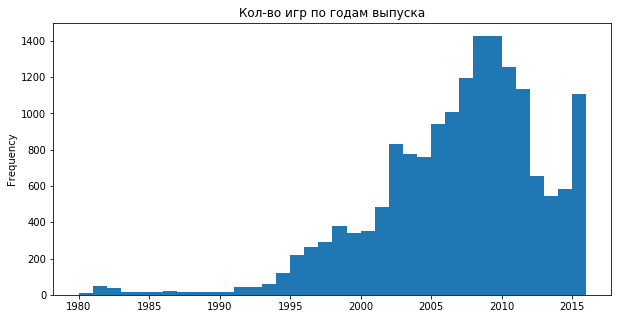

In [10]:
games['year_of_release'].plot(kind='hist', 
                              bins=36, 
                              title='Кол-во игр по годам выпуска',
                              figsize=(10,5)
                             )

До 1995 года игр выходило мало, очевидно, из-за того, что игровых консолей не было, ПК было мало, играли, в основном, на игровых автоматах.  
В 1995 - 2000 г. наблюдается рост кол-ва новых игр. В 2002 - 2005 г. рост ускоряется и достигает пика в 2008 - 2009 годах. Максимальное кол-во новых игр выходило в период 2007 - 2011 г. и всплеск в 2015 году.  
Ранние года не интересны для анализа. Более интересно изучать период с 2008 года. 

__3.2 Посмотрите, как менялись продажи по платформам__  
Выберите платформы с наибольшими суммарными продажами и постройте распределение по годам. За какой характерный срок появляются новые и исчезают старые платформы?

In [11]:
# выберем платформы с наибольшими продажами
(games.groupby('platform')
        .agg({'world_sales': 'sum'})
        .sort_values(by='world_sales', ascending=False)
        .head(10))

,world_sales
platform,
PS2,1233.56
X360,961.24
PS3,931.34
Wii,891.18
DS,802.78
PS,727.58
PS4,314.14
GBA,312.88
PSP,289.53


Начиная с 7-й позиции продажи резко падают, будем рассматривать только первые 6 платформ.  
Забавно, но на 7-й позиции - PS4! Видимо консоль тогда только вышла и не успела собрать продажи. БОльшая часть игр продавалась еще для старых консолей.

In [12]:
# автоматизируем построение графиков
def draw_platform_revenue(platform):
    pl = games.query('platform == @platform').groupby('year_of_release').agg({'world_sales': 'sum'})
    pl.plot(kind='bar', title='Продажи по годам для '+ platform + ', млн.usd', figsize=(8,4), grid=True)
    plt.show()

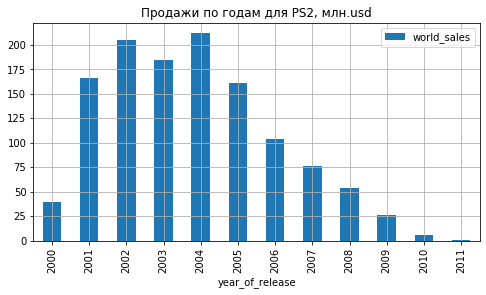

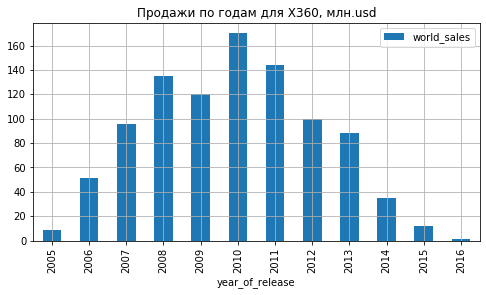

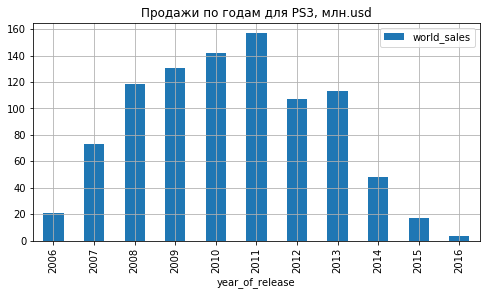

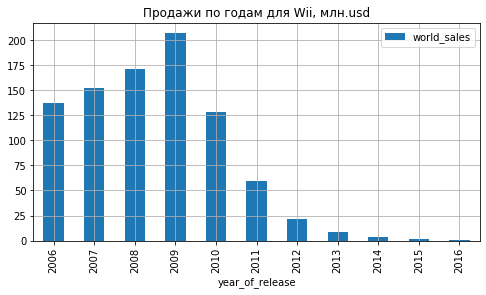

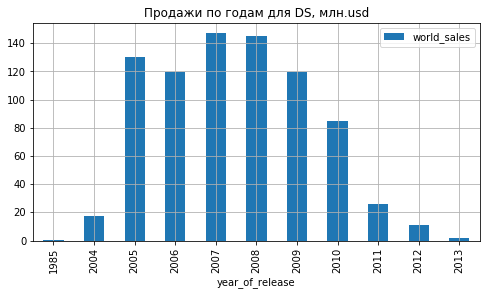

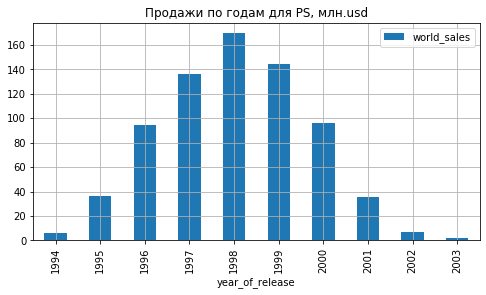

In [13]:
# кол-во топовых (по продажам) платформ, которые берем для анализа
TOP_PLATFORMS_COUNT = 6

# список платформ для анализа/сравнения
platforms = (games.groupby('platform')
        .agg({'world_sales': 'sum'})
        .sort_values(by='world_sales', ascending=False)
        .head(TOP_PLATFORMS_COUNT)).index.tolist()

for i in platforms:
    draw_platform_revenue(i)

"Срок жизни" консолей равен 10 - 12 лет - это период, когда игроки покупают игры для консоли.  
Период "Активных продах" равен 5 лет - это период максимальных продаж игр, т.е. популярности консоли у игроков. Затем спад продаж практически до нуля и завершение продаж игр.

__3.3 Возьмите данные за соответствующий актуальный период__  
Актуальный период определите самостоятельно в результате исследования предыдущих вопросов. Основной фактор — эти данные помогут построить прогноз на 2017 год.  
Не учитывайте в работе данные за предыдущие годы.

In [14]:
# период (лет) для анализа данных по игровым платформам
PERIOD_TO_ANALYSE = 5

# год, для которого строим прогноз
YEAR_TO_ANALYSE = 2017

# сделаем срез данных только за актуальный период
games_actual = games.query('year_of_release >= (@YEAR_TO_ANALYSE - @PERIOD_TO_ANALYSE)')
games_actual.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2886 entries, 16 to 16714
Data columns (total 12 columns):
name               2886 non-null object
platform           2886 non-null object
year_of_release    2886 non-null int64
genre              2886 non-null object
na_sales           2886 non-null float64
eu_sales           2886 non-null float64
jp_sales           2886 non-null float64
other_sales        2886 non-null float64
critic_score       2886 non-null float64
user_score         2886 non-null float64
rating             2886 non-null object
world_sales        2886 non-null float64
dtypes: float64(7), int64(1), object(4)
memory usage: 293.1+ KB


Для анализа возьмем период - 5 лет, т.к. это период максимальных продаж игр для игровых консолей. Чтобы изучить предпочтения игроков на 2017 год мы будем смотреть данные начиная с 2012 года. В этот период попадают продажи игр для платформ, которые также будут использоваться в 2017 году.  
Если брать бОльший период, то в выборку попадут платформы, которые уже выходят с рынка. Предпочтения игроков на более старых платформах могут быть другие, т.к. жанр и стилистика игр сильно зависит от технических возможностей платформы. В 1985 году самой покупаемой была игра Super Mario - простая ходилка, но потом GTA вышла на консолях.. а через 5-10 лет супер-покупаемыми будут VR игры (GTA 6 видимо)

__3.4 Какие платформы лидируют по продажам, растут или падают?__  
Выберите несколько потенциально прибыльных платформ.

In [15]:
# найдем лидеров по мировым продажам
games_actual.groupby('platform').agg({'world_sales': 'sum'}).sort_values(by='world_sales', ascending=False)

,world_sales
platform,
PS4,314.14
PS3,288.79
X360,236.54
3DS,194.61
XOne,159.32
WiiU,82.19
PC,62.65
PSV,49.18
Wii,35.37


In [16]:
# и построим сводную таблицу в разрезе платформ и года выпуска игр
revenue = (pd.pivot_table(games_actual, 
                index='year_of_release', 
                values='world_sales', 
                columns=['platform'], 
                aggfunc=['sum'])
)

revenue

sum                                                    \
platform           3DS     DS     PC     PS3     PS4   PSP    PSV    Wii   
year_of_release                                                            
2012             51.36  11.01  23.22  107.36     NaN  7.69  16.19  21.71   
2013             56.57   1.54  12.38  113.25   25.99  3.14  10.59   8.59   
2014             43.76    NaN  13.28   47.76  100.00  0.24  11.90   3.75   
2015             27.78    NaN   8.52   16.82  118.90  0.12   6.25   1.14   
2016             15.14    NaN   5.25    3.60   69.25   NaN   4.25   0.18   

                                      
platform          WiiU   X360   XOne  
year_of_release                       
2012             17.56  99.74    NaN  
2013             21.65  88.58  18.96  
2014             22.03  34.74  54.07  
2015             16.35  11.96  60.14  
2016              4.60   1.52  26.15

Из сводной таблицы уже видно, что DS и PSP уже закончили свой жизненный путь и их нужно исключить из анализа  
А у меня была PSP когда-то!

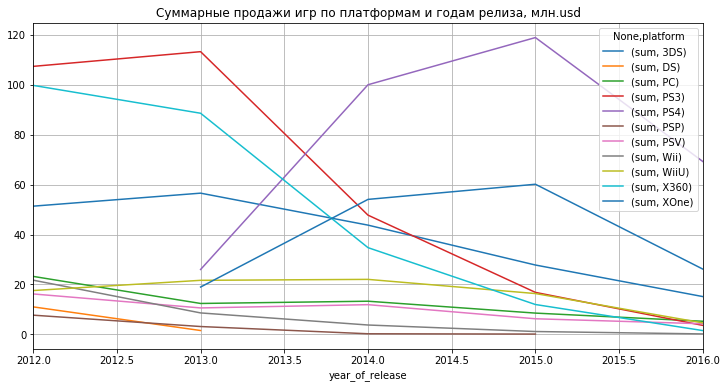

In [17]:
revenue.plot(kind='line', 
                 title='Суммарные продажи игр по платформам и годам релиза, млн.usd', 
                 figsize=(12, 6), 
                 grid=True)

График показывает, что top5 платформ по суммарным продажам игр (см. таблицу выше) делили между собой рынок игр начиная с 2012 года. У PS4 и XOne максимум продаж приходится на 2015 год - это наиболее "свежие" платформы в нашем рейтинге. Остальные платформы (PS3, X360, 3DS) находятся в конце своего жизненного цикла.  
В 2016 году у всех платформ спад продаж, он также виден на гистограммах выше.  
Для дальнейшего рассмотрения возьмем 2 наиболее "свежие" платформы. Очевидно, что в 2017 году именно эти платформы будут формировать мировые продажи. Даже если появится новая платформа (PS5 выйдет в 2020), то ей потребуется примерно 2 года, чтобы выйти на пик продаж игр.

__3.5 Постройте график «ящик с усами» по глобальным продажам игр в разбивке по платформам__.  
Опишите результат.

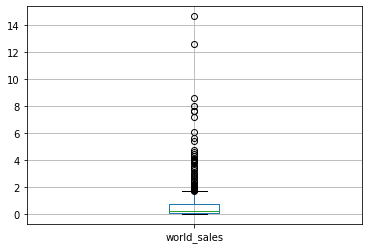

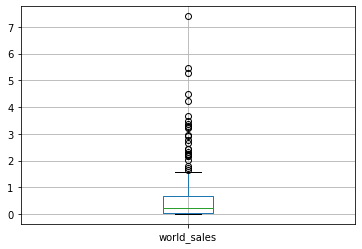

In [18]:
platforms = ['PS4', 'XOne']
for i in platforms:
    games_actual.query('platform == @i').boxplot('world_sales')
    plt.show()

Для market maker платформ 2016 года (PS4, XOne) ящик с усами показывает, что есть много "заурядных" игр, у которых низкие продажи, и есть выбросы "шедевры" - популярные игры, которые и собирают основные продажи. Нам для выявления факторов влияющих на продажи игр интересны, в первую очередь, "выбросы" - супер-популярные игры.   
На основе диаграммы можно определить порог "популярности" игр, которые следует рассматривать.

__3.6 Посмотрите, как влияют на продажи внутри одной популярной платформы отзывы пользователей и критиков.__  
Постройте диаграмму рассеяния и посчитайте корреляцию между отзывами и продажами. Сформулируйте выводы.

In [19]:
# создадим отдельный датасет без нулевых рейтингов
ps4_ratings = (games_actual
                    .loc[:, ['platform', 
                             'world_sales', 
                             'critic_score', 
                             'user_score']]
                    .query('platform == "PS4" and critic_score > 0 and user_score > 0')
              )

In [33]:
# посчитаем коэффициент корреляции Пирсона между продажами игр и отзывами
print('Коэф. корреляции мировых продаж игры и оценки критиков:\n', 
      ps4_ratings['world_sales'].corr(ps4_ratings['critic_score']),
      '\n',
      'Коэф. корреляции мировых продаж игры и оценки игроков:\n',
      ps4_ratings['world_sales'].corr(ps4_ratings['user_score'])
     )

Коэф. корреляции мировых продаж игры и оценки критиков:
 0.40589480145836687 
 Коэф. корреляции мировых продаж игры и оценки игроков:
 -0.03362497596528878


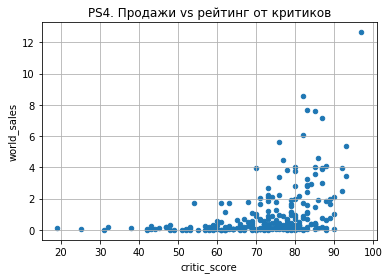

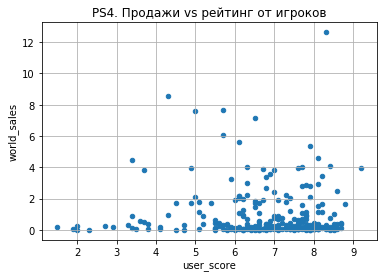

In [34]:
# диаграммы рассеяния
ps4_ratings.plot(x='critic_score', 
                   y='world_sales', 
                   kind='scatter', 
                   grid=True, 
                   title = 'PS4. Продажи vs рейтинг от критиков')

ps4_ratings.plot(x='user_score', 
                   y='world_sales', 
                   kind='scatter', 
                   grid=True, 
                   title = 'PS4. Продажи vs рейтинг от игроков')

Корреляция продаж и рейтингов игр слабая, практически отсутствует.  
Диаграммы показывают, что множество игр имеют высокие отзывы и низкие продажи, при этом. И буквально единицы игр (правый верхний квадрант на диаграммах) с очень высокими продажами и высокими рейтингами от игроков и критиков.  
Вывод 1 - рейтинги не являются драйвером продаж видеоигр.  
Вывод 2 - рейтинг критиков и игроков часто не совпадает.

__3.7 Соотнесите выводы с продажами игр на других платформах__.

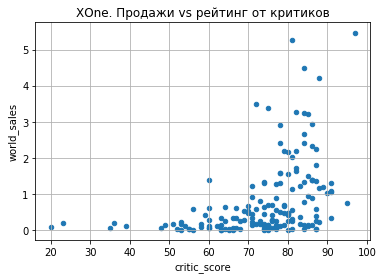

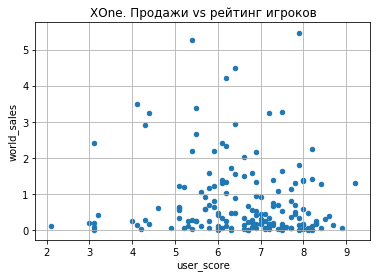

In [22]:
# построим диаграммы корреляции для XOne
xone_ratings = (games_actual
                    .loc[:, ['platform', 
                             'world_sales', 
                             'critic_score', 
                             'user_score']]
                    .query('platform == "XOne" and critic_score > 0 and user_score > 0')
              )

xone_ratings.plot(x='critic_score', 
                   y='world_sales', 
                   kind='scatter', 
                   grid=True, 
                   title = 'XOne. Продажи vs рейтинг от критиков')

xone_ratings.plot(x='user_score', 
                   y='world_sales', 
                   kind='scatter', 
                   grid=True, 
                   title = 'XOne. Продажи vs рейтинг игроков')

Аналогичная картина - взаимосвязь слабая или вообще отсутствует.

__3.8 Посмотрите на общее распределение игр по жанрам__.  
Что можно сказать о самых прибыльных жанрах? Выделяются ли жанры с высокими и низкими продажами?

In [23]:
# посмотрим самые прибыльные жанры
games_actual.groupby('genre').agg({'world_sales': 'sum'}).sort_values(by='world_sales', ascending=False)

,world_sales
genre,
Action,441.12
Shooter,304.73
Role-Playing,192.80
Sports,181.07
Misc,85.04
Platform,61.00
Racing,53.50
Fighting,44.49
Simulation,35.12


In [24]:
# и еще кол-во игр по жанрам
games_actual.groupby('genre').agg({'name': 'count'}).sort_values(by='name', ascending=False)

,name
genre,
Action,1031
Role-Playing,370
Adventure,302
Sports,268
Shooter,235
Misc,192
Racing,115
Fighting,109
Platform,85


Все достаточно логично - экшен и шутеры на первых местах по продажам и кол-ву игр, головоломки и стратегии - на последнем (думать любят не много людей...).  
Из этой картины выбивается жанр Adventure - он на 3-м месте по кол-ву игр, но в конце списка по продажам. Видимо, в этом жанре пока не придумали как хорошо монетизировать такие игры.

### Вывод
1. __Количество новых игр по годам__  
До 1995 года игр выходило мало, очевидно, из-за того, что игровых консолей не было, ПК также было мало, играли, в основном, на игровых автоматах.
В 1995 - 2000 г. наблюдается рост кол-ва новых игр. В 2002 - 2005 г. рост ускоряется и достигает пика в 2008 - 2009 годах. Максимальное кол-во новых игр выходило в период 2007 - 2011 г. и всплеск в 2015 году.
Ранние года не интересны для анализа. Более интересно изучать период с 2008 года.
2. __Как менялись продажи по платформам__  
"Срок жизни" консолей равен 10 - 12 лет - это период, когда игроки покупают игры для консоли.
Период "Активных продах" равен 5 лет - это период максимальных продаж игр, т.е. популярности консоли у игроков. Затем спад продаж практически до нуля и завершение продаж игр.  
На основе сравнения суммарных продаж имеет смысл отобрать 6 платформ для дальнейшего анализа. Начиная с 7-й позиции продажи резко падают (Забавно, но на 7-й позиции - PS4! Видимо консоль тогда еще только вышла и не успела собрать продажи).
3. __Определите актуальный период__  
Для анализа возьмем период - 5 лет, т.к. это период максимальных продаж игр для игровых консолей. Чтобы изучить предпочтения игроков на 2017 год мы будем смотреть данные начиная с 2012 года. В этот период попадают продажи игр для платформ, которые также будут использоваться в 2017 году.
Если брать бОльший период, то в выборку попадут платформы, которые уже выходят с рынка. Предпочтения игроков на более старых платформах могут быть другие, т.к. жанр и стилистика игр сильно зависит от технических возможностей платформы. В 1985 году самой покупаемой была игра Super Mario - простая ходилка, но потом GTA вышла на консолях.. а через 5-10 лет супер-покупаемыми будут VR игры (GTA 6 видимо)
4. __Какие платформы лидируют по продажам__  
top5 платформ по суммарным продажам игр (см. таблицу выше) делили между собой рынок игр начиная с 2012 года. У PS4 и XOne максимум продаж приходится на 2015 год - это наиболее "свежие" платформы в нашем рейтинге. Остальные платформы (PS3, X360, 3DS) находятся в конце своего жизненного цикла.
В 2016 году у всех платформ спад продаж, он также виден на гистограммах выше.
Для дальнейшего рассмотрения возьмем 2 наиболее "свежие" платформы. Очевидно, что в 2017 году именно эти платформы будут формировать мировые продажи. Даже если появится новая платформа (PS5 выйдет в 2020), то ей потребуется примерно 2 года, чтобы выйти на пик продаж игр.
5. __Ящик с усами и продажами__  
Для market maker платформ 2016 года (PS4, XOne) ящик с усами показывает, что есть много "заурядных" игр (медиана рынка), у которых низкие продажи, и есть выбросы "шедевры" - популярные игры, которые и собирают основные продажи. Нам для выявления факторов влияющих на продажи игр интересны, в первую очередь, "выбросы" - супер-популярные игры.
На основе ящика с усами можно определить порог "популярности" игр, которые следует рассматривать.
6. __Взаимосвязь продаж и отзывов__  
Корреляция продаж и рейтингов игр слабая, практически отсутствует.
Диаграммы показывают, что множество игр имеют высокие отзывы и низкие продажи, при этом. И буквально единицы игр (правый верхний квадрант на диаграммах) с очень высокими продажами и высокими рейтингами от игроков и критиков.  
Вывод 1 - рейтинги не являются драйвером продаж видеоигр.  
Вывод 2 - рейтинг критиков и игроков часто не совпадает.
7. __Распределение игр по жанрам__  
Все достаточно логично - экшен и шутеры на первых местах по продажам и кол-ву игр, головоломки и стратегии - на последнем (думать любит не много людей...).
Из этой картины выбивается жанр Adventure - он на 3-м месте по кол-ву игр, но в конце списка по продажам.

### Шаг 4. Составьте портрет пользователя каждого региона
Определите для пользователя каждого региона (NA, EU, JP):
- Самые популярные платформы (топ-5). Опишите различия в долях продаж.

In [25]:
# определим популярные платформы
region_sales = (games_actual
                   .groupby('platform')
                   .agg({'na_sales': 'sum', 
                         'eu_sales': 'sum', 
                         'jp_sales': 'sum', 
                         'world_sales': 'sum'
                        }
                       )
              )

# суммарные продажи по регионам
na_total_sales = games_actual['na_sales'].sum()
eu_total_sales = games_actual['eu_sales'].sum()
jp_total_sales = games_actual['jp_sales'].sum()

# доля платформы от общих продаж по региону
region_sales['na_share'] = round(region_sales['na_sales'] / na_total_sales, 2)
region_sales['eu_share'] = round(region_sales['eu_sales'] / eu_total_sales, 2)
region_sales['jp_share'] = round(region_sales['jp_sales'] / jp_total_sales, 2)

print('Top5 платформ для Северной Америки:\n', 
      region_sales.sort_values(by='na_sales', ascending=False).loc[:, ['na_share']].head(),
      '\n'
     )

print('Top5 платформ для Европы:\n', 
      region_sales.sort_values(by='eu_sales', ascending=False).loc[:, ['eu_share']].head(),
      '\n'
     )


print('Top5 платформ для Японии:\n', 
      region_sales.sort_values(by='jp_sales', ascending=False).loc[:, ['jp_share']].head()
     )

Top5 платформ для Северной Америки:
           na_share
platform          
X360          0.24
PS4           0.18
PS3           0.17
XOne          0.16
3DS           0.09 

Top5 платформ для Европы:
           eu_share
platform          
PS4           0.28
PS3           0.21
X360          0.15
XOne          0.10
3DS           0.08 

Top5 платформ для Японии:
           jp_share
platform          
3DS           0.46
PS3           0.18
PSV           0.11
PS4           0.08
WiiU          0.07


Microsoft сильна на домашнем рынке (X360, XOne), но плохо продается в Японии.  
В Европе больше любят Sony (PS3, PS4).  
__И тут сюрприз__ - доля старших консолей PlayStation очень низкая на домашнем рынке Sony - в Японии. Японцы делают PS3, PS4 для европейцев, а сами играют на портативных консолях

- Самые популярные жанры (топ-5). Поясните разницу.

In [26]:
# определим популярные жанры
region_genre = (games_actual
                   .groupby('genre')
                   .agg({'na_sales': 'sum', 
                         'eu_sales': 'sum', 
                         'jp_sales': 'sum', 
                         'world_sales': 'sum'
                        }
                       )
              )

region_genre['na_share'] = round(region_genre['na_sales'] / na_total_sales, 2)
region_genre['eu_share'] = round(region_genre['eu_sales'] / eu_total_sales, 2)
region_genre['jp_share'] = round(region_genre['jp_sales'] / jp_total_sales, 2)

print('Top5 жанров для Северной Америки:\n', 
      region_genre.sort_values(by='na_sales', ascending=False).loc[:, ['na_share']].head(),
      '\n'
     )

print('Top5 жанров для Европы:\n', 
      region_genre.sort_values(by='eu_sales', ascending=False).loc[:, ['eu_share']].head(),
      '\n'
     )


print('Top5 жанров для Японии:\n', 
      region_genre.sort_values(by='jp_sales', ascending=False).loc[:, ['jp_share']].head()
     )

Top5 жанров для Северной Америки:
               na_share
genre                 
Action            0.30
Shooter           0.24
Sports            0.14
Role-Playing      0.11
Misc              0.06 

Top5 жанров для Европы:
               eu_share
genre                 
Action            0.31
Shooter           0.22
Sports            0.14
Role-Playing      0.10
Racing            0.05 

Top5 жанров для Японии:
               jp_share
genre                 
Role-Playing      0.34
Action            0.27
Misc              0.07
Simulation        0.05
Fighting          0.05


В Америке и Европе любят жанры Экшен, Шутер и Спорт. В Японии предпочитают Ролевые игры.  
Предпочтения Японии отличаются от двух других регионов.

- Влияет ли рейтинг ESRB на продажи в отдельном регионе?

In [35]:
# В разрезе регионов сгруппируем продажи по рейтингам игр и посчитаем долю относительно всех продаж
region_ratings = (games_actual
                   .groupby('rating')
                   .agg({'na_sales': 'sum', 
                         'eu_sales': 'sum', 
                         'jp_sales': 'sum'
                        }
                       )
              )

print('Северная Америка:\n', 
      region_ratings.sort_values(by='na_sales', ascending=False).loc[:, ['na_sales']],
      '\n'
     )

print('Европа:\n', 
      region_ratings.sort_values(by='eu_sales', ascending=False).loc[:, ['eu_sales']],
      '\n'
     )

print('Япония:\n', 
      region_ratings.sort_values(by='jp_sales', ascending=False).loc[:, ['jp_sales']],
      '\n'
     )

Северная Америка:
              na_sales
rating               
M              231.57
E              114.37
Not defined    103.31
E10+            75.70
T               66.02 

Европа:
              eu_sales
rating               
M              193.96
E              113.03
Not defined     91.50
E10+            55.37
T               52.96 

Япония:
              jp_sales
rating               
Not defined    108.84
E               28.33
T               26.02
M               21.20
E10+             8.19 



Рейтинг игры не влияет на продажи в разрезе региона, картина примерно одинаковая по всем 3-м регионам:
- M (Mature) и E (Everyone) на первых местах  

В Японии было продано большое кол-во игр, для которых у нас нет данных по рейтингу ESRB

### Вывод
- __Top-5 платформ__  
Microsoft сильна на домашнем рынке (X360, XOne), но плохо продается в Японии.  
В Европе больше любят Sony (PS3, PS4). В России, кстати, тоже.  
В Японии доля старших консолей PlayStation очень низкая и это на домашнем рынке Sony! Видимо, японцы делают PS3, PS4 для европейцев, а сами играют на портативных консолях.
- __Top-5 жанров__  
В Америке и Европе любят жанры Экшен, Шутер и Спорт.В Японии предпочитают Ролевые игры.  
Предпочтения в Японии отличаются от двух других регионов - ну это не новость.
- __Влияние рейтинга ESRB на продажи__  
Рейтинг игры не влияет на продажи в разрезе региона, картина одинаковая по всем 3-м регионам:  
M (Mature) на первом месте  
E (Everyone) — на втором  
И такое распределение объясняется тем, что это самая платежеспособная категория.

### Шаг 5. Проверьте гипотезы
__Гипотеза 1__. Средние пользовательские рейтинги платформ Xbox One и PC одинаковые

Нулевая гипотеза: средний пользовательский рейтинг платформы XBox One равен среднему пользовательскому рейтингу PC.  
Альтернативная гипотеза: средний пользовательский рейтинг платформы XBox One не равен среднему пользовательскому рейтингу PC.  

Необходимо проверить гипотезу о равенстве двух независимых генеральных совокупностей. Совокупности являются независимыми, т.к. мнение (рейтинг игр) игроков одной платформы не зависит от мнения игроков других платформ.

Уровень статистической значимости возьмем 1%

In [28]:
alpha = .01
results = st.ttest_ind(games_actual
                       .query('platform == "XOne"')
                       .loc[:, 'user_score']
                       .to_list(), 
                       games_actual
                       .query('platform == "PC"')
                       .loc[:, 'user_score']
                       .to_list()
                      )

print('p-значение:', results.pvalue)

if (results.pvalue < alpha):
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

p-значение: 0.0679776646270018
Не получилось отвергнуть нулевую гипотезу


__Нулевая гипотеза не отвергается__, т.е. средний пользовательский рейтинг для XBox One и PC одинаковый.
Это логично, игра нравится или не нравится игрокам и это не зависит от того, на чем они играют.

__Гипотеза 2__. Средние пользовательские рейтинги жанров Action (англ. «действие», экшен-игры) и Sports (англ. «спортивные соревнования») разные

Нулевая гипотеза: средний пользовательский рейтинг игр жанра Action равен среднему пользовательскому рейтингу игр жанра Sports.  
Альтернативная гипотеза: средний пользовательский рейтинг игр жанра Action не равен среднему пользовательскому рейтингу игр жанра Sports. 

Необходимо проверить гипотезу о равенстве двух независимых генеральных совокупностей. Совокупности являются независимыми, т.к. мнение игроков об играх одного жанра не зависит от мнения игроков об играх другого жанра.

Уровень статистической значимости возьмем 1%

In [29]:
alpha = .01
results = st.ttest_ind(games_actual
                       .query('genre == "Action"')
                       .loc[:, 'user_score']
                       .to_list(), 
                       games_actual
                       .query('genre == "Sports"')
                       .loc[:, 'user_score']
                       .to_list()
                      )

print('p-значение:', results.pvalue)

if (results.pvalue < alpha):
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

p-значение: 0.030525082904009942
Не получилось отвергнуть нулевую гипотезу


__Нулевая гипотеза не отвергается__, т.е. рейтинги игр Actions и Sports одинаковые.

## Общий вывод  
### Задачи исследования
Нужно было выявить определяющие успешность игры закономерности. Это позволит сделать ставку на потенциально популярный продукт и спланировать рекламные кампании.
### Шаг 1. Изучение информации о данных  
Датасет содержит 16715 записей, в данных есть пропуски
### Шаг 2. Подготовка данных  
Названия столбцов были приведены к нижнему регистру, обработаны пропуски в данных, добавлен столбец world_sales - суммарные продажи во всех регионах.
### Шаг 3. Исследовательский анализ данных  
1. __Количество новых игр по годам__  
До 1995 года игр выходило мало, очевидно, из-за того, что игровых консолей не было, ПК были "слабые", играли, в основном, на игровых автоматах. В 1995 - 2000 г. наблюдается рост кол-ва новых игр. В 2002 - 2005 г. рост ускоряется и достигает пика в 2008 - 2009 годах. Максимальное кол-во новых игр выходило в период 2007 - 2011 г. и всплеск в 2015 году.
2. __Как менялись продажи по платформам__  
"Срок жизни" консолей равен 10 - 12 лет - это период, когда игроки покупают игры для консоли. Период "Активных продах" равен 5 лет - это период максимальных продаж игр, т.е. популярности консоли у игроков. Затем спад продаж практически до нуля и завершение продаж игр.
3. __Актуальный период для анализа данных__  
Для анализа возьмем период - 5 лет, т.к. это период максимальных продаж игр для игровых консолей. Чтобы изучить предпочтения игроков на 2017 год мы будем смотреть данные начиная с 2012 года. В этот период попадают продажи игр для платформ, которые также будут использоваться в 2017 году. Если брать бОльший период, то в выборку попадут платформы, которые уже выходят с рынка. Предпочтения игроков на более старых платформах могут быть другие, т.к. жанр и стилистика игр сильно зависит от технических возможностей платформы.  
В 1985 году самой покупаемой была игра Super Mario - простая ходилка, но потом GTA вышла на консолях.. а через 5-10 лет супер-покупаемыми будут VR игры (GTA 6 видимо)
4. __Какие платформы лидируют по продажам__  
Top-5 платформ по суммарным продажам игр (см. таблицу выше) делили между собой рынок игр начиная с 2012 года. У PS4 и XOne максимум продаж приходится на 2015 год - это наиболее "свежие" платформы в нашем рейтинге. Остальные платформы (PS3, X360, 3DS) находятся в конце своего жизненного цикла. В 2016 году у всех платформ спад продаж, он также виден на гистограммах выше. Для дальнейшего рассмотрения возьмем 2 наиболее "свежие" платформы. Очевидно, что в 2017 году именно эти платформы будут формировать мировые продажи. Даже если появится новая платформа (PS5 выйдет в 2020), то ей потребуется примерно 2 года, чтобы выйти на пик продаж игр.
5. __Ящик с усами и продажами__  
Для market maker платформ 2016 года (PS4, XOne) диаграмма boxplot показывает, что есть много "заурядных" игр (медиана рынка), у которых низкие продажи, и есть выбросы "шедевры" - популярные игры, которые и собирают основные продажи. Нам для выявления факторов влияющих на продажи игр интересны, в первую очередь, "выбросы" - супер-популярные игры. На основе ящика с усами можно определить порог "популярности" игр, которые следует рассматривать.
6. __Взаимосвязь продаж и отзывов__  
Корреляция продаж и рейтингов игр слабая, практически отсутствует. Диаграммы показывают, что множество игр имеют высокие отзывы и низкие продажи, при этом. И буквально единицы игр (правый верхний квадрант на диаграммах) с очень высокими продажами и высокими рейтингами от игроков и критиков.  
Вывод 1 - рейтинги не являются драйвером продаж видеоигр.  
Вывод 2 - рейтинг критиков и игроков часто не совпадает.
7. __Распределение игр по жанрам__  
Экшен и шутеры на первых местах по продажам и кол-ву игр, головоломки и стратегии - на последнем. Из этой картины выбивается жанр Adventure - он на 3-м месте по кол-ву игр, но в конце списка по продажам.

### Шаг 4. Портрет игрока
1. __Top-5 платформ__  
Microsoft сильна на домашнем рынке (X360, XOne), но плохо продается в Японии.
В Европе больше любят Sony (PS3, PS4). В России, кстати, тоже.
В Японии доля старших консолей PlayStation очень низкая и это на домашнем рынке Sony! Видимо, японцы делают PS3, PS4 для европейцев, а сами играют на портативных консолях.
2. __Top-5 жанров__
В Америке и Европе любят жанры Экшен, Шутер и Спорт.В Японии предпочитают Ролевые игры.
Предпочтения в Японии отличаются от двух других регионов - ну это не новость.
3. __Влияние рейтинга ESRB на продажи__
Рейтинг игры не влияет на продажи в разрезе региона, картина одинаковая по всем 3-м регионам:
M (Mature) на первом месте
E (Everyone) — на втором
И такое распределение объясняется тем, что это самая платежеспособная категория. И кроме этого, игры для взрослых покупают обычно взрослые люди и не из-за того, что эти игры имеют рейтинг "18+", а потому что игры интересны взрослым и для них сделаны.

Итого, портрет игрока из Северной Америки - любит Экшен, Шутеры и Спорт, играет на XBox. В Европе - также Экшены, Шутеры и Спорт, но играют больше на PlayStation. В Японии любят ролевые игры и портативные 3DS.
### Шаг 5. Проверка гипотез  
Проверены две гипотезы, выводы:  
- средний пользовательский рейтинг для XBox One и PC одинаковый. Это логично, игра нравится или не нравится игрокам и это не зависит от того, на чем они играют.
- рейтинги игр Actions и Sports одинаковые

### Ответ на вопросы исследования  
Глобально в мире лидируют по продажам игровые консоли от Microsoft и Sony. При планировании рекламных кампаний надо учитывать жизненный цикл консоли, он составляет 10-12 лет - примерно на 3-8й год существования консоли приходится пик популярности и продаж игр. Также нужно учитывать регион - для США и Канады популярны консоли Microsoft, в Европе - Sony, в Японии - портативные консоли Nintendo.  
Среди жанров игр самые популярные Экшены, Шутеры и Спортивные игры. Но также нужно учитывать региональные особенности. С продажами игр жанра Adventure надо быть внимательнее - игр выходит много, но продаются они плохо.  
Рейтинги игр слабо влияют на продажи игр. Если критики высоко оценили игру - это не гарантия, что игра будет хорошо продаваться.